1.Problem Statement
 - Task 1:-Create a predictive model which will help the insurance marketing team to know which customer will buy the product.    Task 2:-Suggestions to the Insurance market team to make customers buy the product.


#Basics Laibraries



In [47]:
import numpy as np
import pandas as pd



In [48]:
# visualisation laibraries
import matplotlib.pyplot as plt
import seaborn as sns

#data preprocessing
from sklearn. model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler


#model development
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


#performance metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score,precision_score,f1_score,roc_auc_score,roc_curve,confusion_matrix,classification_report


#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

#warnings
import warnings
warnings.filterwarnings('ignore')


# Importing Data

In [49]:
data = pd.read_csv('C:\Datamites/insurance claim.csv')
print(data.shape)

(595212, 59)


In [50]:
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [11]:
data.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,4,3,8,0,1,0,0,0,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

# Details
- There are total 595212 Customer details.
- Each datapoint represents individual customer details.
- Dataset contains mixed data types ie., float64(10), int64(49).



In [13]:
data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,595212.0,743803.558435,429367.820429,7.000000,371991.500000,743547.500000,1.115549e+06,1.488027e+06
target,595212.0,0.036448,0.187401,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
ps_ind_01,595212.0,1.900378,1.983789,0.000000,0.000000,1.000000,3.000000e+00,7.000000e+00
ps_ind_02_cat,595212.0,1.358943,0.664594,-1.000000,1.000000,1.000000,2.000000e+00,4.000000e+00
ps_ind_03,595212.0,4.423318,2.699902,0.000000,2.000000,4.000000,6.000000e+00,1.100000e+01
ps_ind_04_cat,595212.0,0.416794,0.493311,-1.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_05_cat,595212.0,0.405188,1.350642,-1.000000,0.000000,0.000000,0.000000e+00,6.000000e+00
ps_ind_06_bin,595212.0,0.393742,0.488579,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_07_bin,595212.0,0.257033,0.436998,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_08_bin,595212.0,0.163921,0.370205,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00


- From this we found
   1. Negative values in few columns.
   2. There is no variance in Standard deviation.


In [15]:
data.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


- In this dataset is having no null values.


In [16]:
data.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [17]:
data.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

- This dataset is represents multiple customers and their features of single insurance company named Porto Seguros's which is given as prefix of every column.
- From 59 columns, except "id" & "target" remaining all 57 columns are considered as independent features of individual customers.
- Target column is having two unique values i.e., 0 & 1, considering them as insurance got claimed as 1 and not claimed as 0.
- This comes under classification algorithm and it is highly imbalanced wrt target.
- For insurance claimed we have 21694 datapoints and 573518 for not claimed.

-For simplicity,we are dividing the dataset based on the feature names like binary, categorical and continuous/calculated features, to check distributions individually.

  

# Binary Features

In [18]:
bin_features=[]
for column in data :
    if column.endswith('bin') :
     bin_features.append(column)
print(bin_features)    
    

['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


In [19]:
len(bin_features)

17

- A total of 17 binary features are present in dataset.


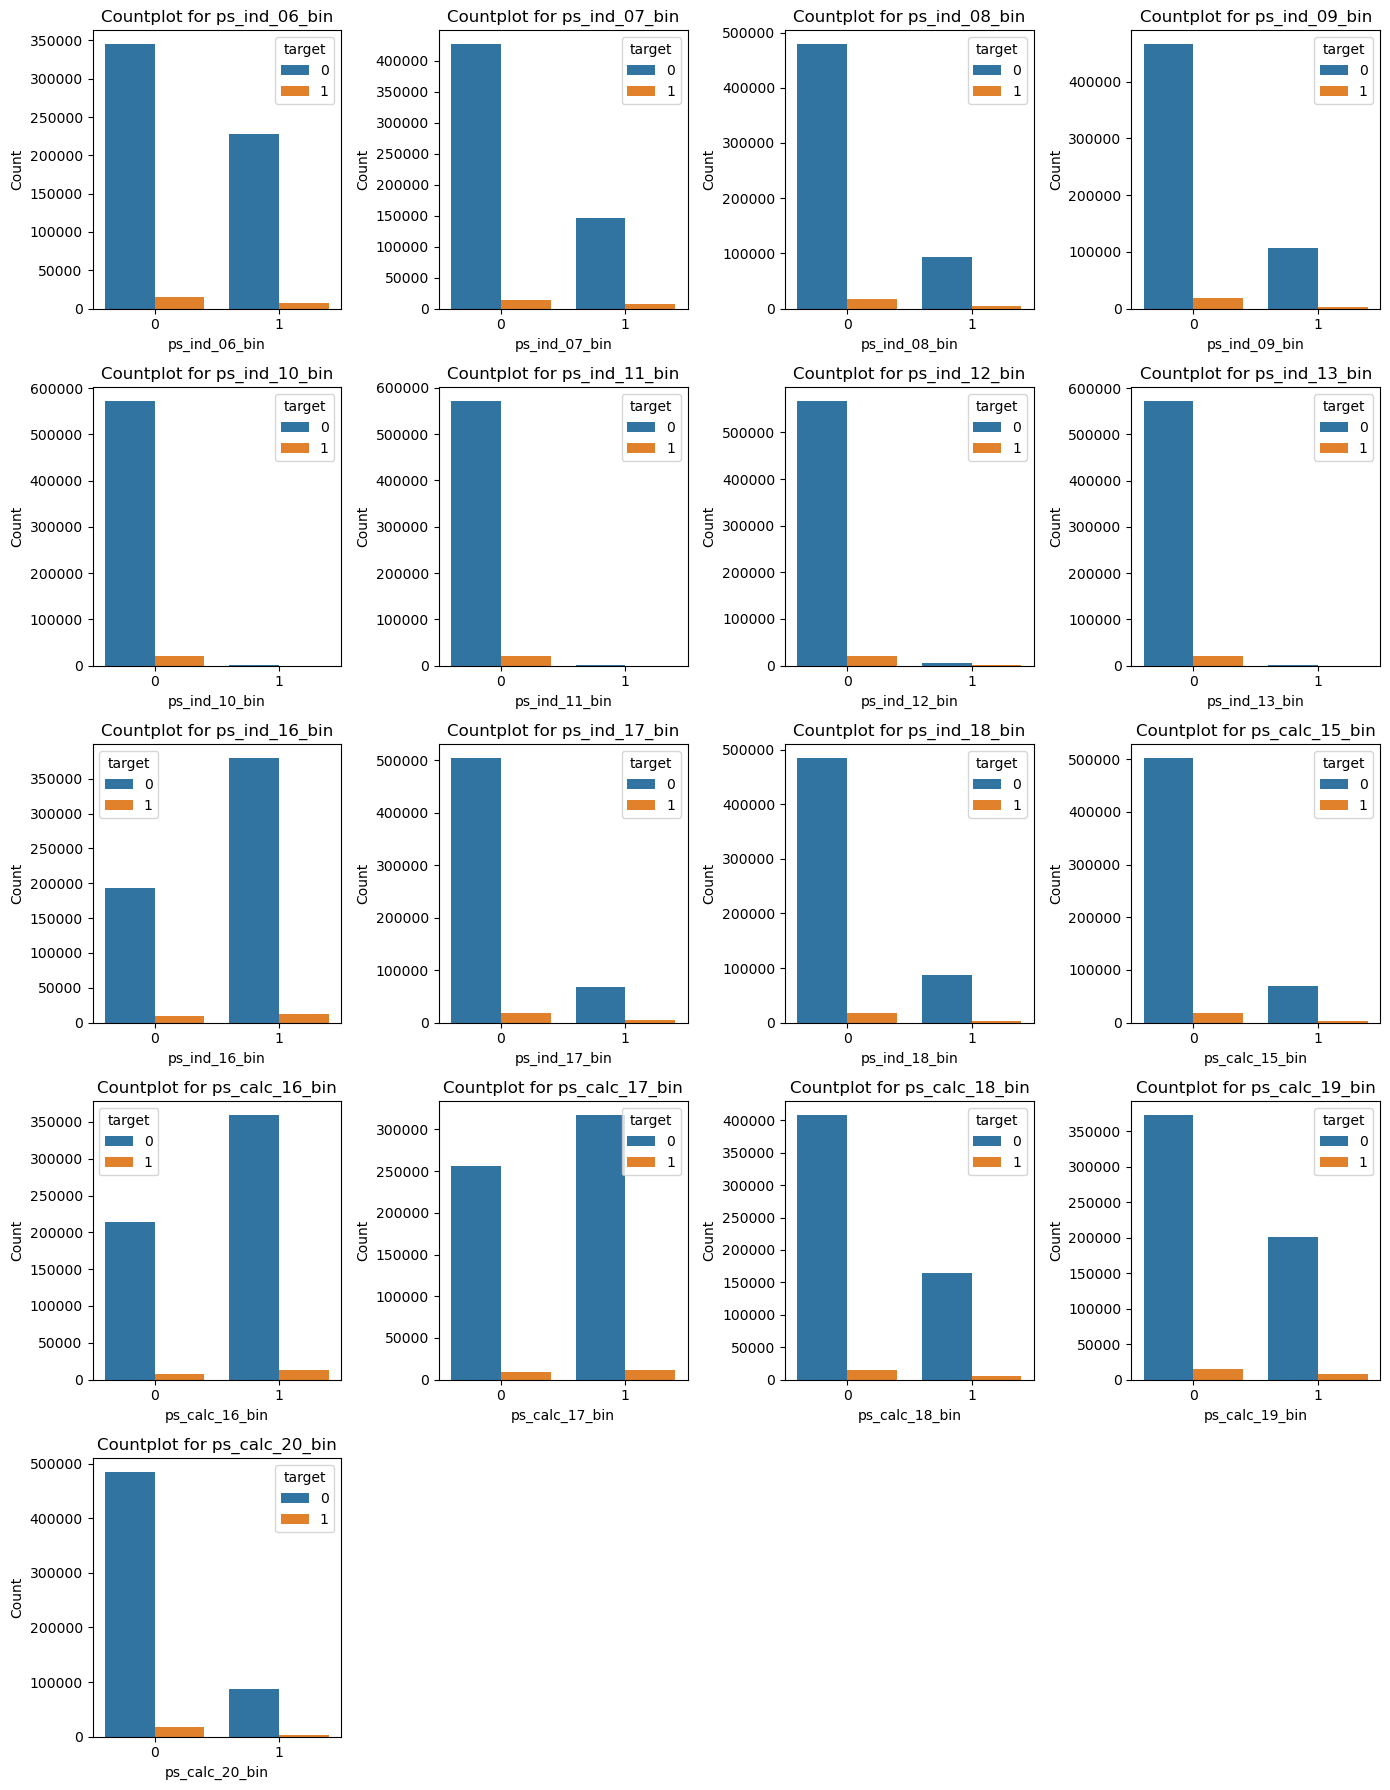

In [21]:
# Checking with binary feature are correlated with target.

plt.figure(figsize=(14, 18))

for i, feature in enumerate(bin_features):
        plt.subplot(5, 4, i+1)
        sns.countplot(x=feature, hue='target', data=data)
        plt.title(f"Countplot for {feature}")
        plt.ylabel("Count")
plt.tight_layout()
    


- There are no outliers in binary features.
- Apart from a few calc features most of the binary features are dominated by a Zero value.
- Some binary features like 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin' least account for the positive class at all whereas for most of the calc features 0's and 1's account almost equally for both positive and negative class.
- Continuous features can be separated into calc and the rest. Both of them can be looked separately.


<Axes: title={'center': 'Correlation Between Binary Features'}>

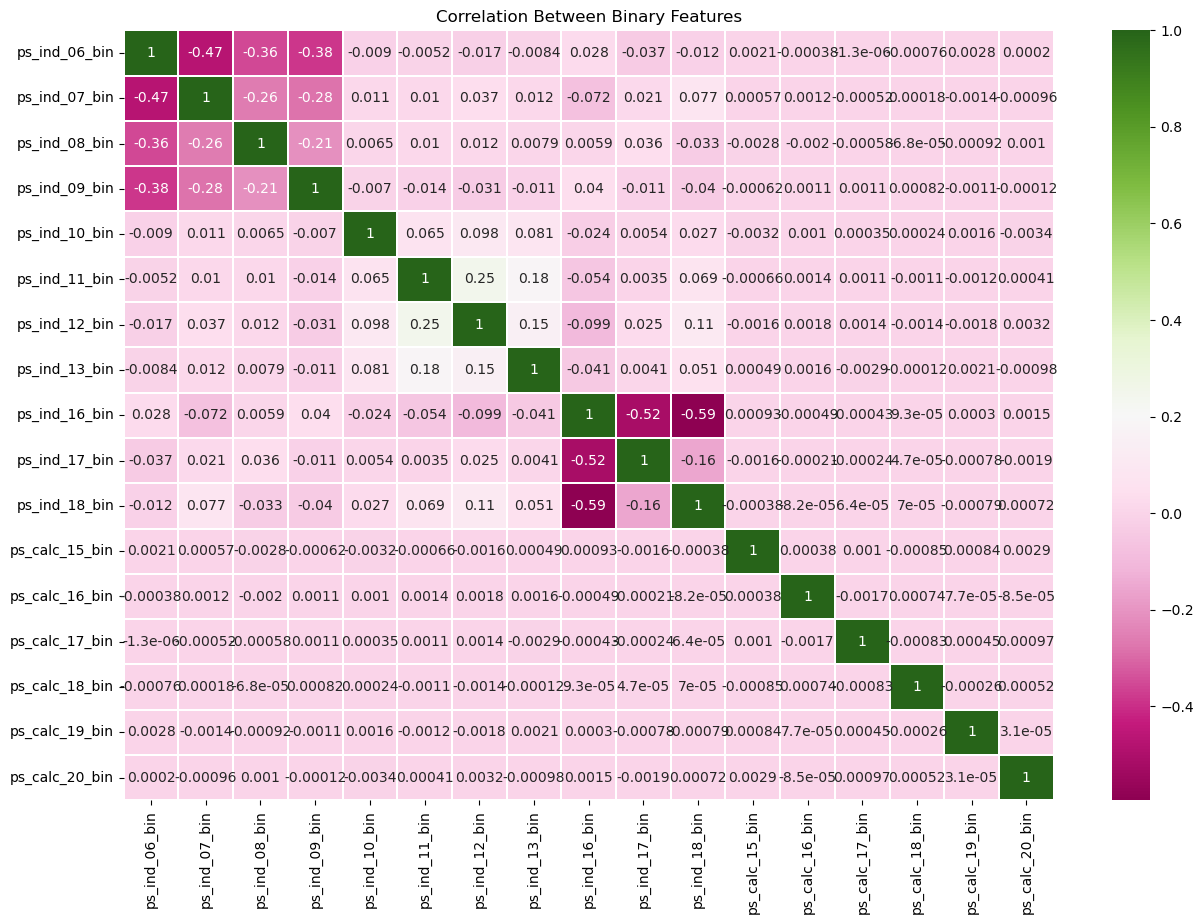

In [22]:
#Correlation Between Binary Features
plt.figure(figsize=(15,10))
plt.title("Correlation Between Binary Features")
sns.heatmap(data[bin_features].corr(), cmap='PiYG', annot = True, linewidths=0.01)


- The binary features dont have any noticeable correlation between them. 'ps_ind_18_bin' and 'ps_ind_16_bin' have the largest negative correlation but nothing of great concern.


Categorical features


In [23]:
cat_features=[]
for column in data :
    if column.endswith('cat') :
        cat_features.append(column)
print(cat_features)        

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


In [ ]:
len(cat_features)

- A total of 14 categorical features are present in dataset.


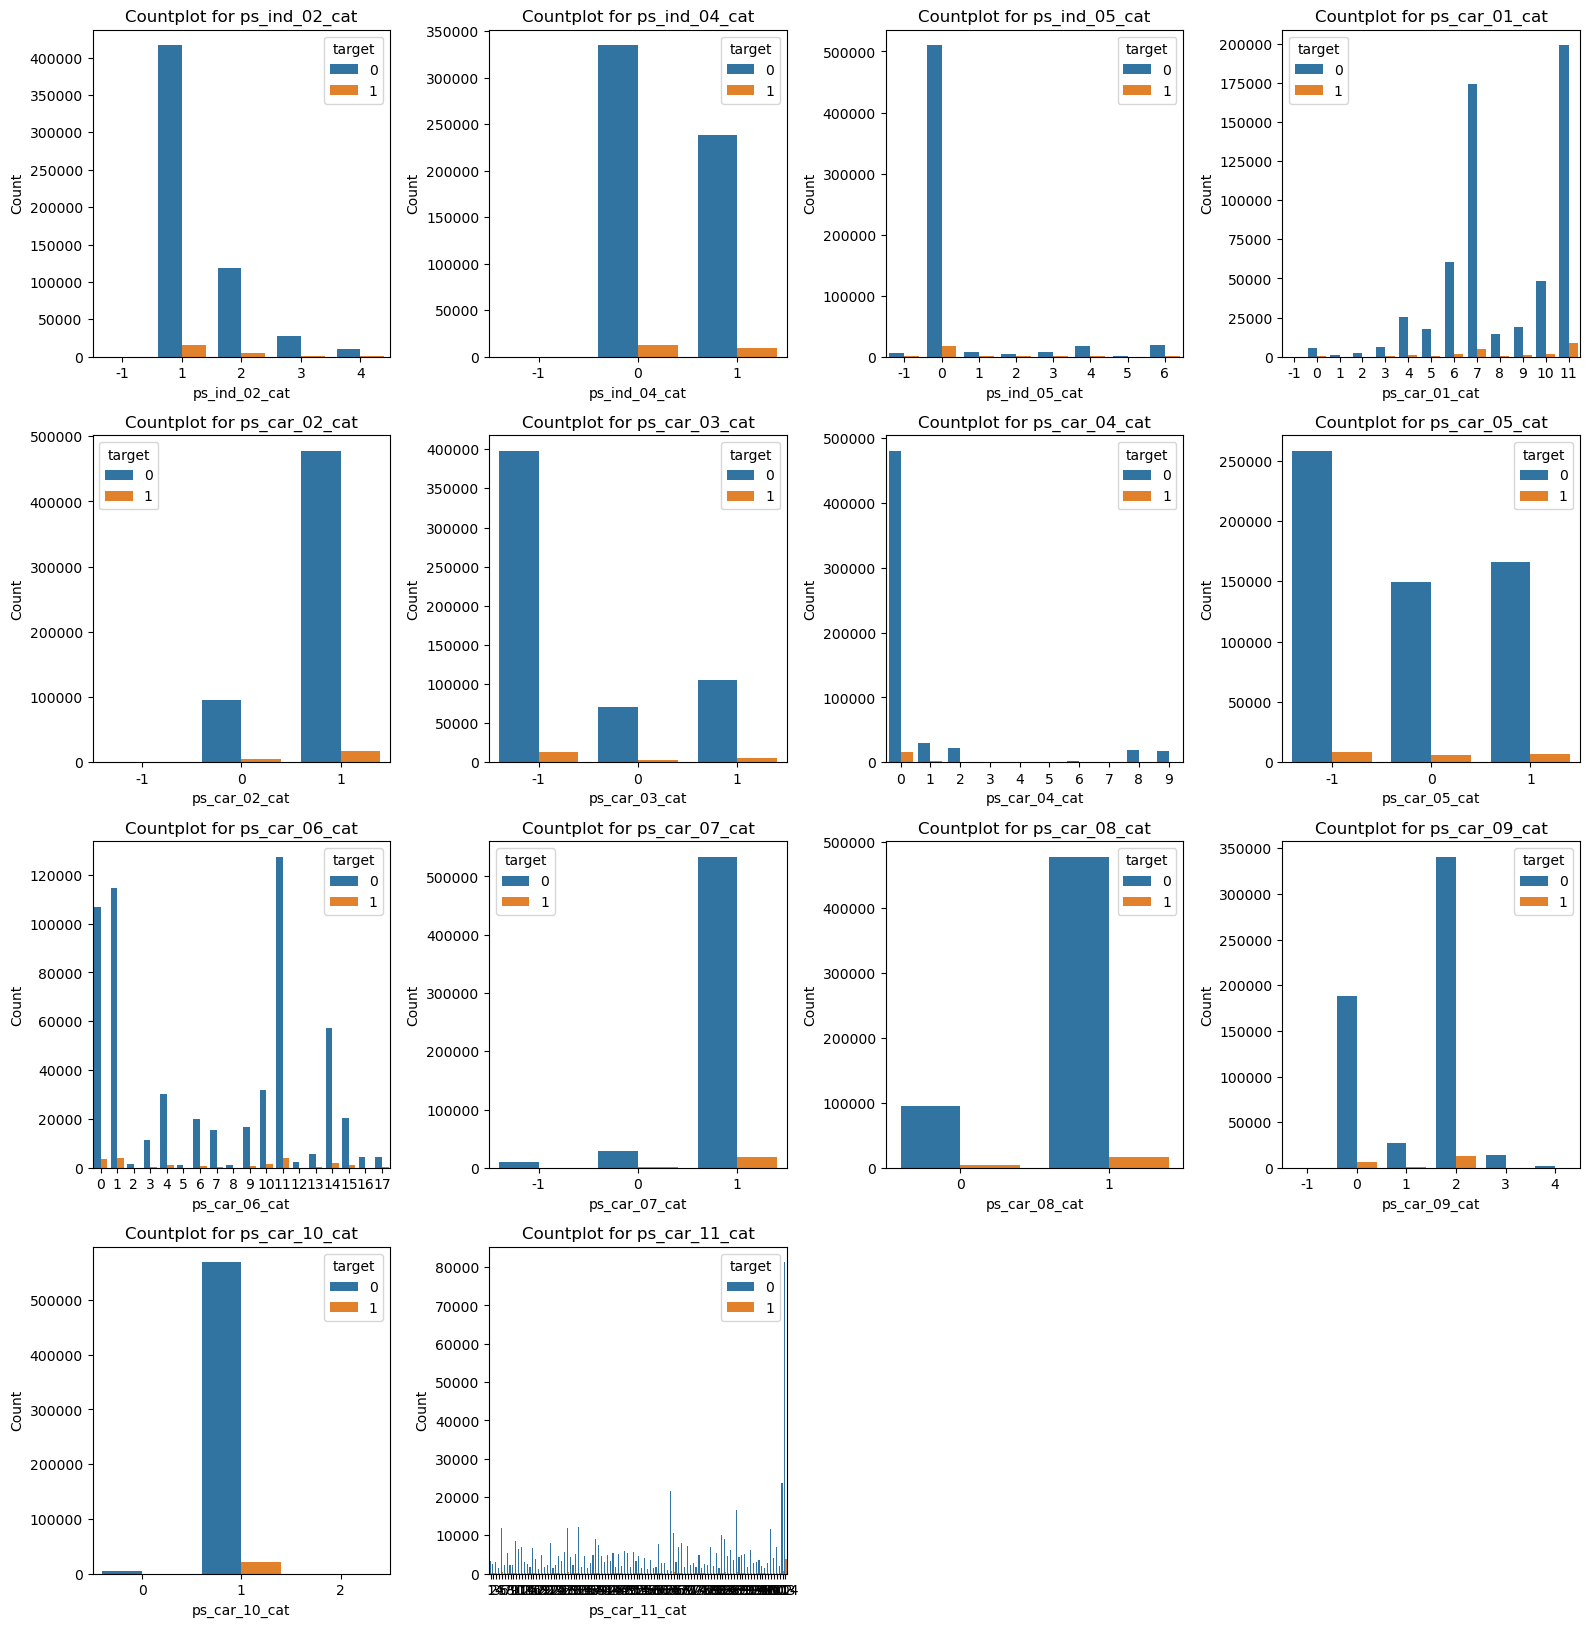

In [24]:
# Checking how categorical features are correlated with target.

plt.figure(figsize=(16, 20))

for i, feature in enumerate(cat_features):
    plt.subplot(5, 4, i+1)
    sns.countplot(x=feature, hue='target', data=data)
    plt.title(f"Countplot for {feature}")
    plt.ylabel("Count")

plt.tight_layout()

- Feature 'ps_car_11_cat' stands out in the categorical features since it has the highest cardinality. Rest all the features have relatively low cardinality.
- Some features like 'ps_ind_05_cat' and 'ps_car_04_cat' mostly consists of a single value. Therefore the mode of these features can be used for filling their missing values.
- The missing values of each of the categorical features can be filled.

In [ ]:
cat_features=['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


<Axes: title={'center': 'Correlation Between Categorical Features'}>

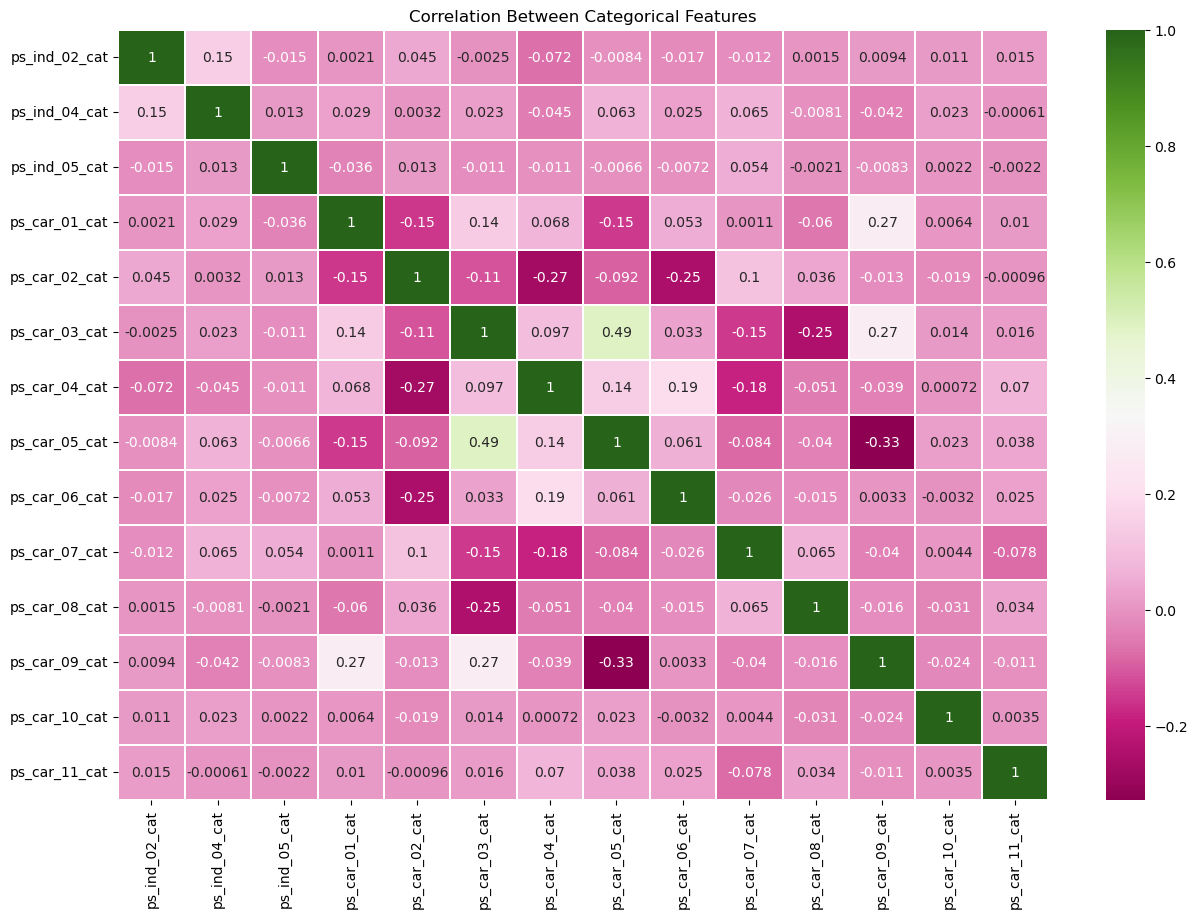

In [26]:
#Correlation Between Categorical Features

plt.figure(figsize=(15,10))
plt.title("Correlation Between Categorical Features")
sns.heatmap(data[cat_features].corr(), cmap='PiYG', annot = True, linewidths=0.01)

- Even categorical features dont have any noticeable correlation between them.




CONTINUOUS FEATURES


- Continuous features can be separated into calc and the rest. Both of them can be looked separately.



In [28]:
num_features_wo_calc= data[['ps_ind_01','ps_ind_03','ps_ind_14','ps_ind_15','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15']]


In [29]:
num_features_wo_calc


,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15
0,2,5,0,11,0.7,0.2,0.718070,2,0.400000,0.883679,0.370810,3.605551
1,1,7,0,3,0.8,0.4,0.766078,3,0.316228,0.618817,0.388716,2.449490
2,5,9,0,12,0.0,0.0,-1.000000,1,0.316228,0.641586,0.347275,3.316625
3,0,2,0,8,0.9,0.2,0.580948,1,0.374166,0.542949,0.294958,2.000000
4,0,0,0,9,0.7,0.6,0.840759,3,0.316070,0.565832,0.365103,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
595207,3,10,0,13,0.5,0.3,0.692820,3,0.374166,0.684631,0.385487,2.645751
595208,5,3,0,6,0.9,0.7,1.382027,2,0.387298,0.972145,-1.000000,3.605551
595209,1,10,0,12,0.9,0.2,0.659071,3,0.397492,0.596373,0.398748,1.732051
595210,5,3,0,12,0.9,0.4,0.698212,3,0.374166,0.764434,0.384968,3.162278


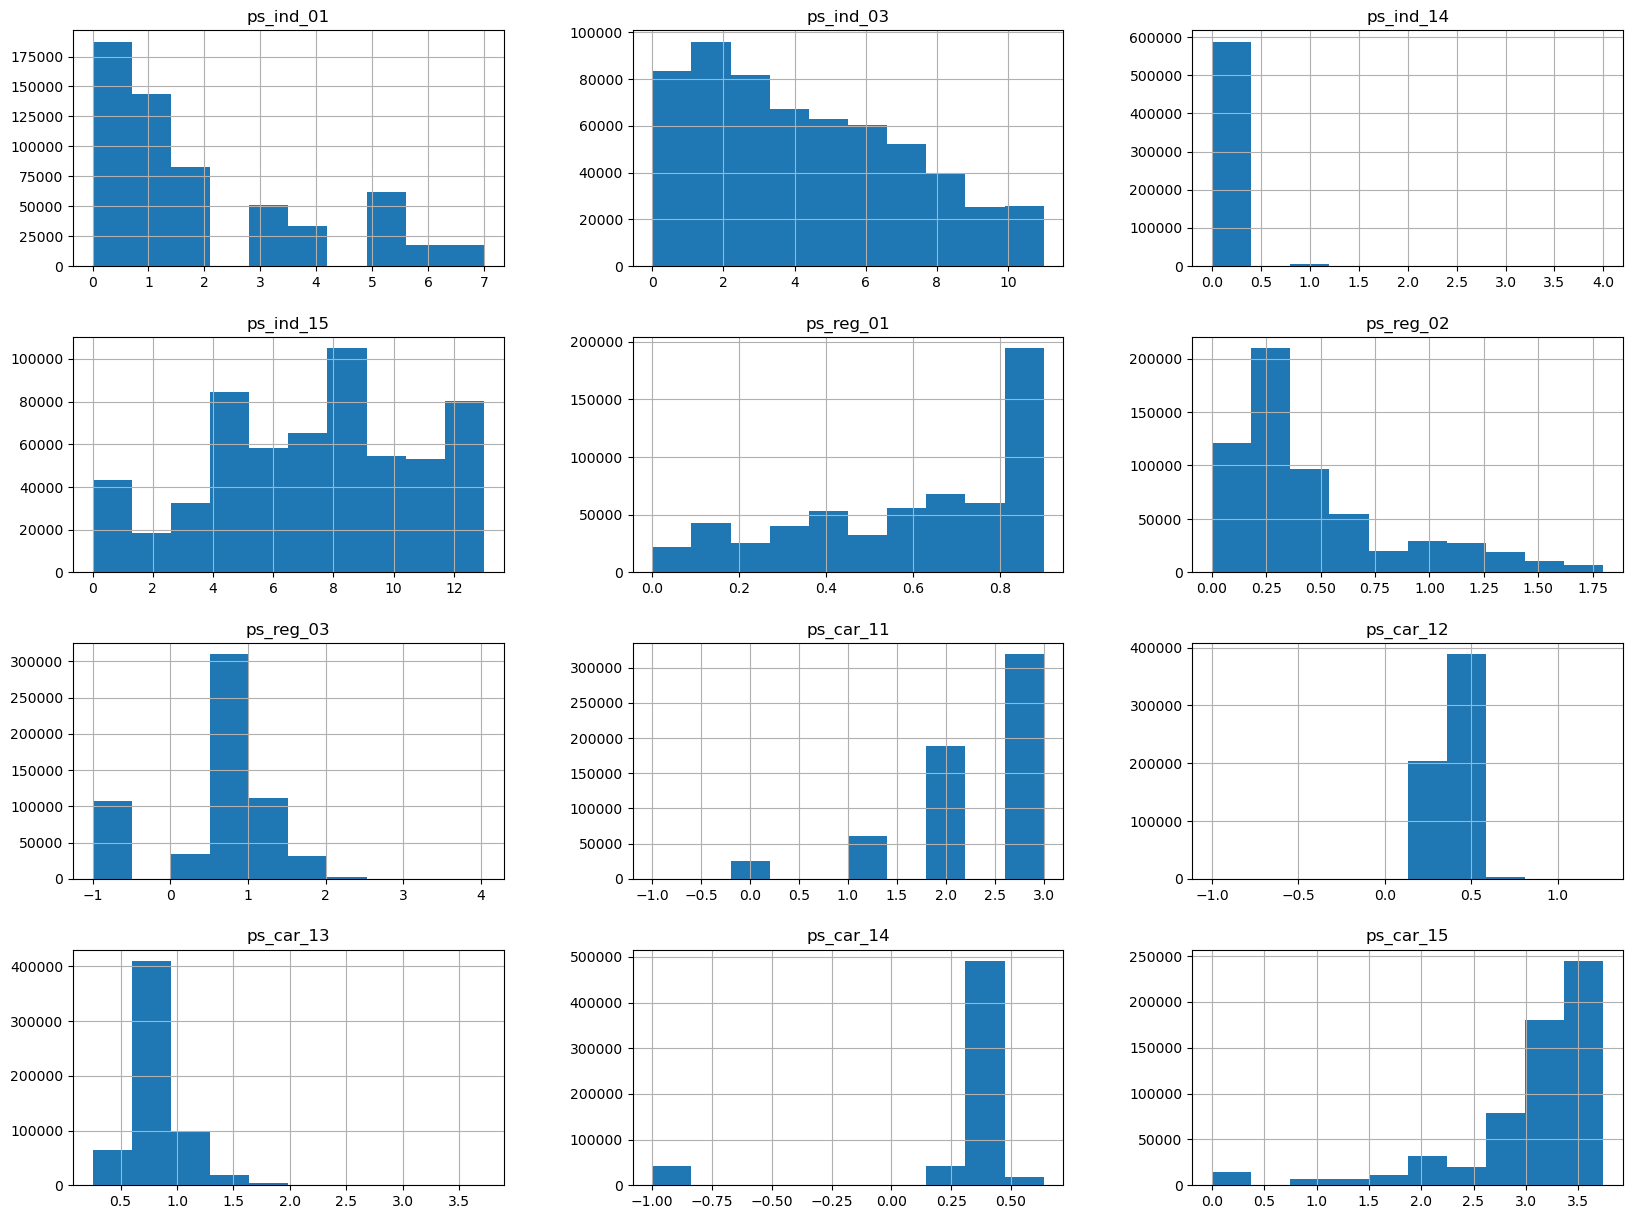

In [30]:
# Checking the distibution of numerical features without calculated.

data[['ps_ind_01','ps_ind_03','ps_ind_14','ps_ind_15','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15']].hist(figsize=(20,15))
plt.show()

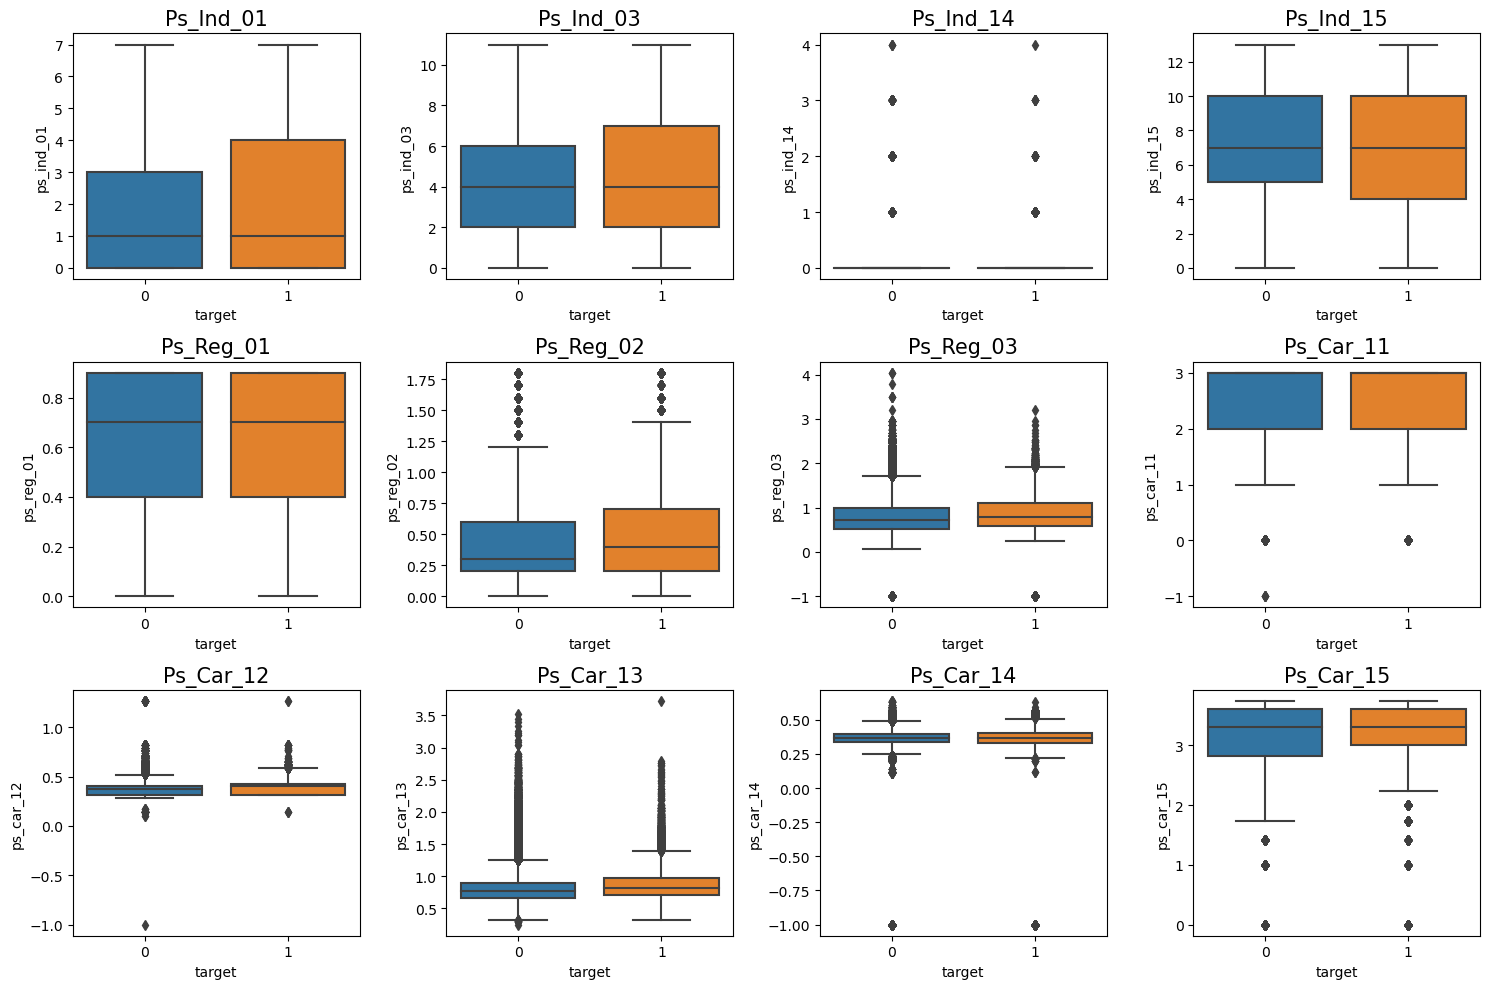

In [31]:
# boxplots for numerical features without calculated wrt target.

fig, ax= plt.subplots(3,4, figsize=(15, 10))

num_features_wo_calc= data[['ps_ind_01','ps_ind_03','ps_ind_14','ps_ind_15','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15']]
for col, ax in zip(num_features_wo_calc, ax.flatten()):
    sns.boxplot(x='target',y=col, data=data, ax=ax)

    ax.set_title(col.title(), fontsize=15);

plt.tight_layout()

- The data has no outliers. - The boxplots shows the seperabilty of each feature with the class labels. Although the features doesnt seem to exhibit high varying patterns for the two classes, there are small differences in skewness and mean that could help in separating both classes.
- For example features like 'ps_ind_01', 'ps_reg_02', 'ps_ind_03','ps_car_13' all have different skews and distribution of data for both classes. Those features could prove valuable in determining the final result.
- 'ps_reg_02' in particular has a noticeable difference in mean and distribution for both classes.
- there are small differences in skewness and mean that could help in separating both classes.


In [32]:
num_features_with_calc=data[['ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14']]


In [33]:
num_features_with_calc


,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
0,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8
1,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9
2,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7
3,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9
4,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6
595208,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8
595209,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6
595210,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2


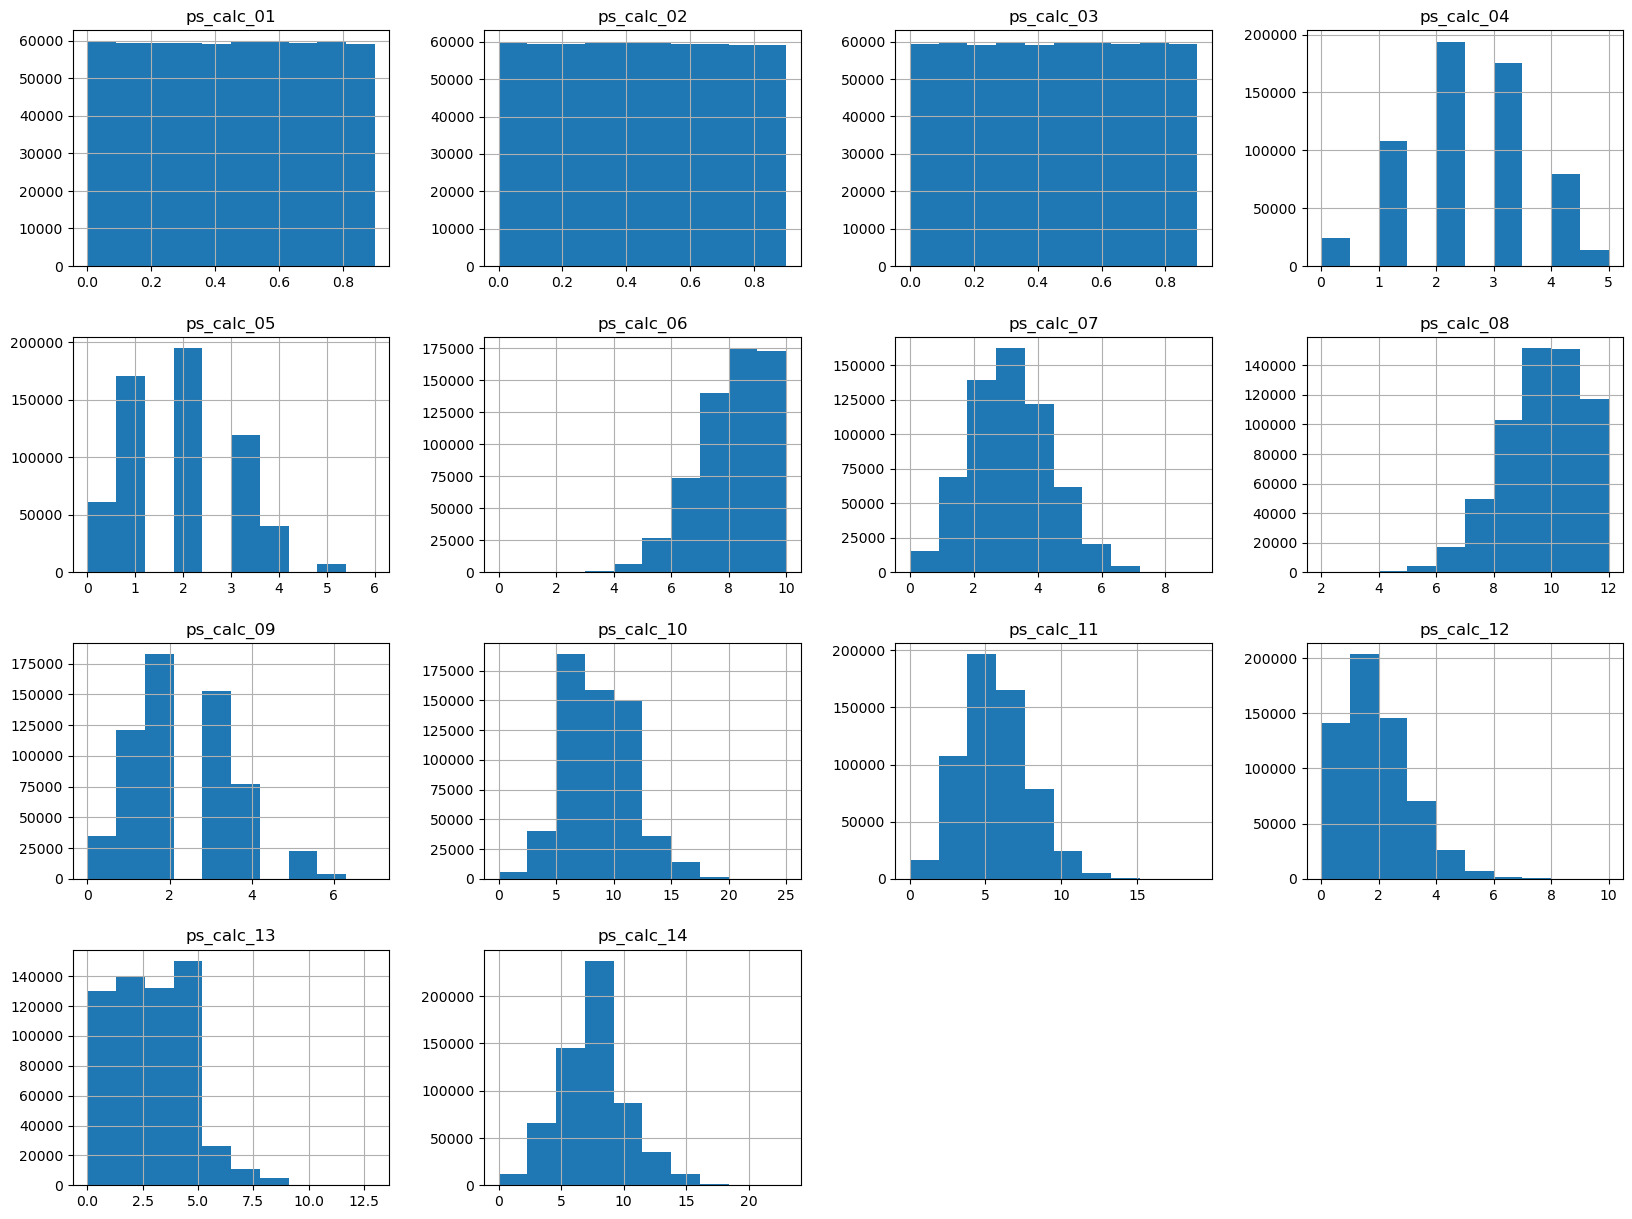

In [34]:
# Checking the distibution of numerical features with calculated.

data[['ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14']].hist(figsize=(20,15))
plt.show()


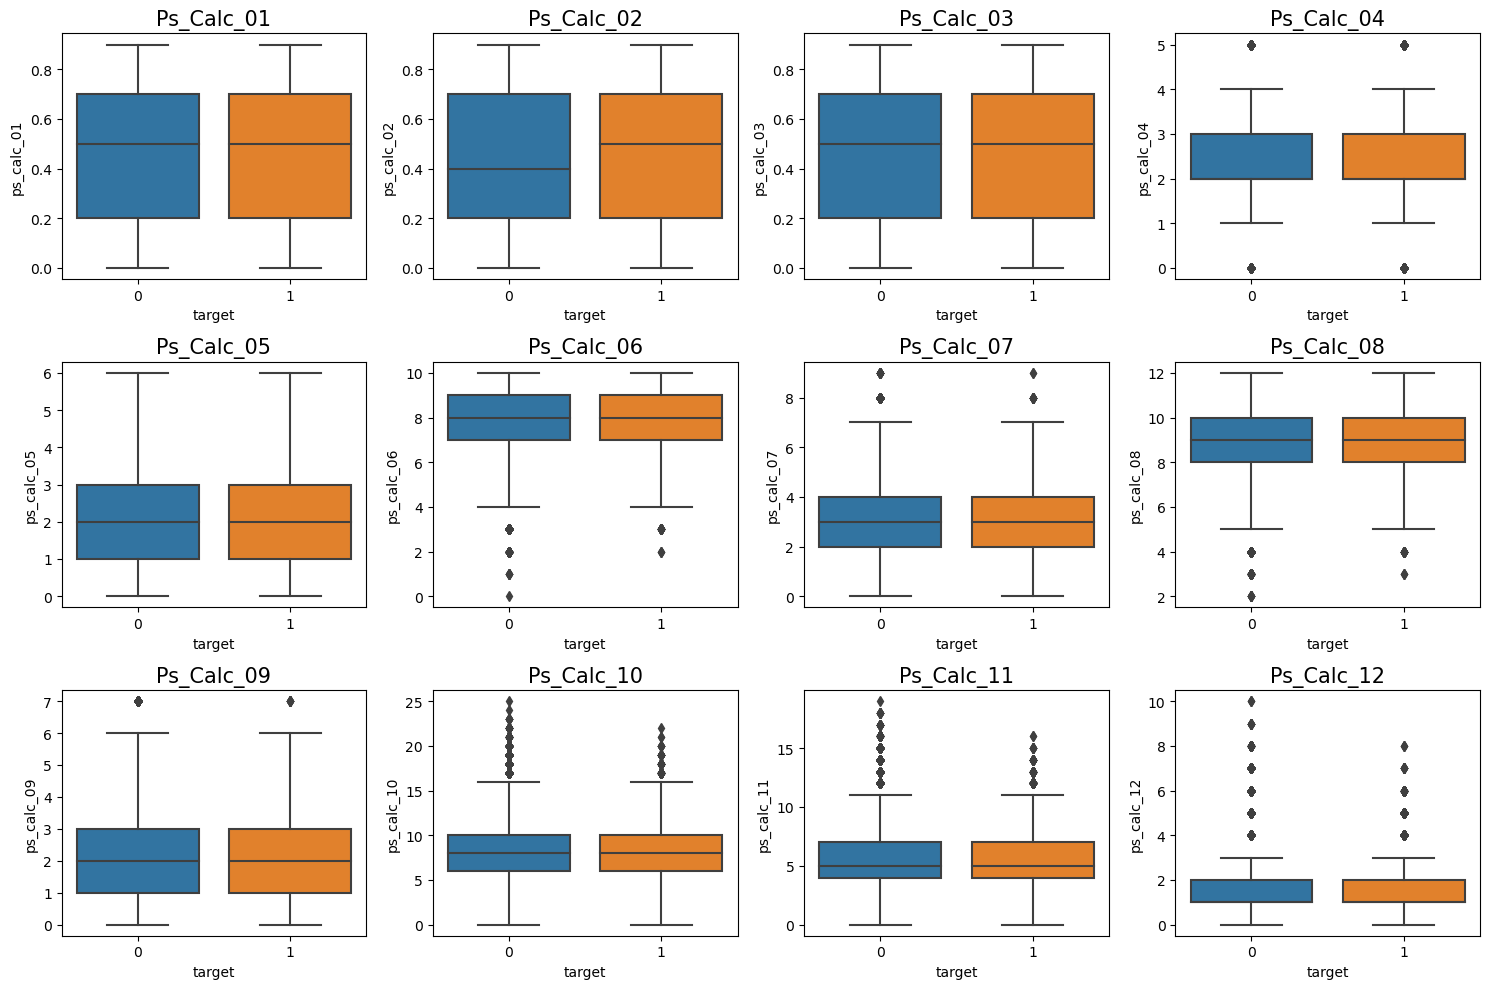

In [35]:
# boxplots for numerical features with calculated wrt target.


fig, ax= plt.subplots(3,4, figsize=(15, 10))
num_features_with_calc=data[['ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14']]

for col, ax in zip(num_features_with_calc, ax.flatten()):
    sns.boxplot(x='target',y=col, data=data, ax=ax)

    ax.set_title(col.title(), fontsize=15);

plt.tight_layout()

- Apart from 'ps_calc_02' there is no difference between the two class distributions in any of the calc features. There is no valuable info provided by any of the calc features.


#  Data Pre-Processing


In [51]:
# dropping the id column
data.drop('id',axis=1,inplace=True)


- ID columns are generally unique values assgined to customers. it is not affecting the target variable. So lets remove 'id' column from the dataset, Otherwise it increasing the dimentionality of the dataset for no reason.


In [52]:
data.shape

(595212, 58)

- After droping 'id' we have 58 features including 'target' column.


In [53]:
data.duplicated().sum()


0

- No Duplicates found in the dataset.


### Handling Missing Values


- As mentioned earlier dataset is having NaN values replaced with -1.
- we are replacing -1 values with NaN.

In [54]:
data=data.replace(-1,np.NaN)
data.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2.0,5,1.0,0.0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,0,1,1.0,7,0.0,0.0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,0,5,4.0,9,1.0,0.0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,0,0,1.0,2,0.0,0.0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,0,2.0,0,1.0,0.0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [55]:
data.isnull().sum()


target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


In [56]:
data.target.value_counts()


0    573518
1     21694
Name: target, dtype: int64

- without disturbing the datapoints with 1, we are dropping datapoints with NaN values from 0, as dataset is having more datapoints for Zeros.


In [57]:
data = data.loc[~((data['target'] == 0) & data.isna().any(axis=1))]


-  As these two columns 'ps_car_03_cat' & 'ps_car_05_cat' are having more than 50% we are dropping these two columns.


In [58]:
data.drop(columns=['ps_car_03_cat','ps_car_05_cat'],axis=1,inplace=True)


In [59]:
data.shape


(140955, 56)

In [60]:
data.target.value_counts()


0    119261
1     21694
Name: target, dtype: int64

- The missing values of are replaced by mean or mode and the numerical features can be filled by either mean or median based on their distributions.
- After dropping we have same count for 1's and we reduced count only for 0's.


In [61]:
data.ps_ind_02_cat = np.where(np.isnan(data.ps_ind_02_cat), data['ps_ind_02_cat'].mean(), data.ps_ind_02_cat)
data.ps_ind_04_cat = np.where(np.isnan(data.ps_ind_04_cat), data['ps_ind_04_cat'].mean(), data.ps_ind_04_cat)
data.ps_ind_05_cat = np.where(np.isnan(data.ps_ind_05_cat), data['ps_ind_05_cat'].mode(), data.ps_ind_05_cat)
data.ps_reg_03 = np.where(np.isnan(data.ps_reg_03), data['ps_reg_03'].median(), data.ps_reg_03)
data.ps_car_01_cat = np.where(np.isnan(data.ps_car_01_cat), data['ps_car_01_cat'].mean(), data.ps_car_01_cat)
data.ps_car_02_cat = np.where(np.isnan(data.ps_car_02_cat), data['ps_car_02_cat'].mean(), data.ps_car_02_cat)
data.ps_car_07_cat = np.where(np.isnan(data.ps_car_07_cat), data['ps_car_07_cat'].mode(), data.ps_car_07_cat)
data.ps_car_09_cat = np.where(np.isnan(data.ps_car_09_cat), data['ps_car_09_cat'].mean(), data.ps_car_09_cat)
data.ps_car_11 = np.where(np.isnan(data.ps_car_11), data['ps_car_11'].mode(), data.ps_car_11)
data.ps_car_12 = np.where(np.isnan(data.ps_car_12), data['ps_car_12'].mode(), data.ps_car_12)
data.ps_car_14 = np.where(np.isnan(data.ps_car_14), data['ps_car_14'].mode(), data.ps_car_14)


In [62]:
data.isnull().sum()

target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_04_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0
ps_calc_14        0


- All missing values are replaced wrt mean,median,mode.


### Declaring Features and Target


In [64]:
x=data.drop('target',axis=1 )
y=data['target']

In [65]:
print(x.shape,y.shape)


(140955, 55) (140955,)


- Before moving to next phase, let's first seperate the all features and target from the dataset.


# SCALING
- Creating a DataFrame for the scaled data as df.


In [108]:
from sklearn.ensemble import RandomForestRegressor
x=data.drop('target',axis=1)
y=data['target']

In [109]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [110]:
rf_model.fit(x, y)

RandomForestRegressor(random_state=42)

In [111]:
importances = rf_model.feature_importances_

# Create a dataframe of feature importances
feat_imp = pd.DataFrame({'feature': x.columns, 'importance': importances})

# Sort the dataframe by feature importance score
feat_imp = feat_imp.sort_values('importance', ascending=False).reset_index(drop=True)


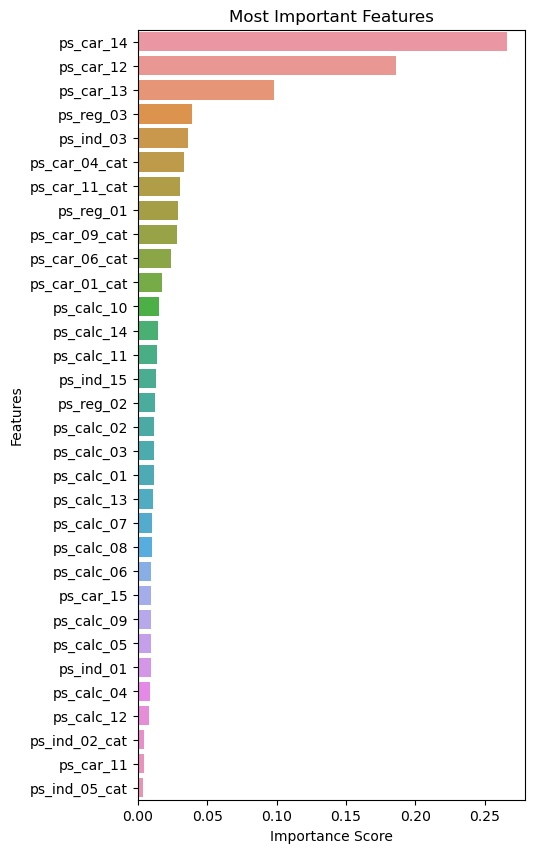

In [112]:
plt.figure(figsize=(5,10))
sns.barplot(x='importance', y='feature', data=feat_imp)
plt.title('Most Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


# slitting

In [115]:
x=data.drop('target',axis=1)
y=data['target']

In [116]:
x.shape

(140955, 32)

In [88]:
y.shape

(140955,)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(98668, 32)
(42287, 32)
(98668,)
(42287,)


# scaling

In [90]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# smoting

In [91]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train_smote,y_train_smote=smote.fit_resample(X_train_scaled,y_train)

In [92]:
from collections import Counter
print('actual',Counter(y_train))
print('smote',Counter(y_train_smote))

actual Counter({0: 83478, 1: 15190})
smote Counter({0: 83478, 1: 83478})


# CREATING MODELS
- LOGISTIC REGRESSION


In [93]:
from sklearn.linear_model import LogisticRegression
#instantiating the object
lr= LogisticRegression()
#training the model
lr.fit(x_train_smote, y_train_smote)
#predicting
y_pred= lr.predict(X_test_scaled)

print('classificationreport-\n',classification_report(y_test, y_pred))

pre_lr= precision_score(y_test,y_pred)
print("Precision score: ", pre_lr)

classificationreport-
               precision    recall  f1-score   support

           0       0.93      0.84      0.88     35783
           1       0.42      0.65      0.51      6504

    accuracy                           0.81     42287
   macro avg       0.68      0.75      0.70     42287
weighted avg       0.85      0.81      0.83     42287

Precision score:  0.4243270189431705


- DECISION TREE CLASSIFIER


In [94]:
# Create an instance of the decision tree model
tree = DecisionTreeClassifier()

# Fit the model to the training data
tree.fit(x_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_tree= tree.predict(X_test_scaled)

print(classification_report(y_test, y_pred_tree))

pre_tree= precision_score(y_test,y_pred_tree)
print("Precision score: ", pre_tree)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     35783
           1       0.64      0.72      0.68      6504

    accuracy                           0.89     42287
   macro avg       0.79      0.82      0.81     42287
weighted avg       0.90      0.89      0.90     42287

Precision score:  0.6396210873146623


- RANDOM FOREST CLASSIFIER


In [99]:
from sklearn.ensemble import RandomForestClassifier

#instantiating object
rf = RandomForestClassifier()

#fitting the model
rf.fit(x_train_smote, y_train_smote)

#predicting
y_pred_rf= rf.predict(X_test_scaled)

print('classificationreport-\n',classification_report(y_test, y_pred_rf))

pre_rf= precision_score(y_test,y_pred_rf)
print("precision score: ", pre_rf)

classificationreport-
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     35783
           1       0.96      0.66      0.78      6504

    accuracy                           0.94     42287
   macro avg       0.95      0.83      0.87     42287
weighted avg       0.94      0.94      0.94     42287

precision score:  0.9575229152693941


## Model Comparison Report

In [103]:
models = pd.DataFrame([pre_lr,pre_tree,pre_rf],
             index=['Logistic Regression','Decision Tree','Random Forest'],columns=['Precision'])
models

,Precision
Logistic Regression,0.424327
Decision Tree,0.639621
Random Forest,0.957523


# Model Comparison Report


- The computational time required for SVC, KNN model is much higher, hence we have excluded them.
- Top performing classifiers on the given dataset are Random Forest.
- For model selection, we will do the hyper-parameter tuning for Random Forest. It might improve the precision score and in turn helps us selecting model with highest precision score.

# Reports on challenges faced

- Due to privacy reasons, name of the features were not given which became a biggest challenge while doing he domain analysis.
- Individual features names will definetly helps in knowing more about dataset and can expect better results.
- Dataset is highly imbalanced wrt 'target' column with 573518 zero's and 21694 one's. which has dominating effect on the performance.
- we tried running our model with different sampling techniques like staratified sampling, undersampling, oversampling.
- Data is highly imbalanced, which has dominating effect on the performance. It can be seen that when we have reduced the domination target, the precision score of the model tend to increase.
- In return, we have run the models using multiple combinations.
- In attempts of increasing performance of the model, we have tried with randomundersampling, which again failed to give us promising precision scores.

###  We trained several models, including Logistic Regression, KNN, Decision Tree, Random Forest and ANN. The top performing classifiers on the given dataset were Random Forest and Decision Tree.

##  Experimentation


### Experiment 1



- we have tried randomundersampling technique for balancing the data, but results are not upto the mark.
- as the computational time is more when applied with SMOTE, we have tried to balance the data by random under sampling technique. But the scores for this are not so great.


## Experiment 2


- As we are loosing some information by dropping missing value rows, so we are experimenting with our algorithms by not deleting the rows and by just imputing them.

in this case, our algorithms failed to give good precision scores.



In [16]:
# WITHOUR DROPPING THE ROWS
df=pd.read_csv('C:\Datamites/insurance claim.csv')

In [17]:
df=df.replace(-1,np.NaN)

In [18]:
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [19]:
df.isnull().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


In [20]:
df.drop(columns=['ps_car_03_cat','ps_car_05_cat'],axis=1,inplace=True)

In [22]:
df.ps_ind_02_cat = np.where(np.isnan(df.ps_ind_02_cat), df['ps_ind_02_cat'].mean(), df.ps_ind_02_cat)
df.ps_ind_04_cat = np.where(np.isnan(df.ps_ind_04_cat), df['ps_ind_04_cat'].mean(), df.ps_ind_04_cat)
df.ps_ind_05_cat = np.where(np.isnan(df.ps_ind_05_cat), df['ps_ind_05_cat'].mode(), df.ps_ind_05_cat)
df.ps_reg_03 = np.where(np.isnan(df.ps_reg_03), df['ps_reg_03'].median(), df.ps_reg_03)
df.ps_car_01_cat = np.where(np.isnan(df.ps_car_01_cat), df['ps_car_01_cat'].mean(), df.ps_car_01_cat)
df.ps_car_02_cat = np.where(np.isnan(df.ps_car_02_cat), df['ps_car_02_cat'].mean(), df.ps_car_02_cat)
df.ps_car_07_cat = np.where(np.isnan(df.ps_car_07_cat), df['ps_car_07_cat'].mode(), df.ps_car_07_cat)
df.ps_car_09_cat = np.where(np.isnan(df.ps_car_09_cat), df['ps_car_09_cat'].mean(), df.ps_car_09_cat)
df.ps_car_11 = np.where(np.isnan(df.ps_car_11), df['ps_car_11'].mode(), df.ps_car_11)
df.ps_car_12 = np.where(np.isnan(df.ps_car_12), df['ps_car_12'].mode(), df.ps_car_12)
df.ps_car_14 = np.where(np.isnan(df.ps_car_14), df['ps_car_14'].mode(), df.ps_car_14)

In [23]:
df.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_04_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0


In [24]:
x_df=df.drop('target',axis=1 )
y_df=df['target']
print(x_df.shape, y_df.shape)

(595212, 56) (595212,)


In [25]:
#scaling the data usning StandardScaler technique.
scaler=StandardScaler()
scaled_df=scaler.fit_transform(x_df)
scaled_df

array([[-1.7323077 ,  0.0502179 ,  0.96550742, ..., -0.63472992,
        -0.73222528,  2.34997253],
       [-1.73230305, -0.45386836, -0.54262441, ..., -0.63472992,
         1.36569991, -0.42553689],
       [-1.73229373,  1.56247669,  3.98177109, ..., -0.63472992,
         1.36569991, -0.42553689],
       ...,
       [ 1.73327863, -0.45386836, -0.54262441, ..., -0.63472992,
        -0.73222528, -0.42553689],
       [ 1.73328794,  1.56247669,  0.96550742, ...,  1.57547323,
        -0.73222528, -0.42553689],
       [ 1.73330192, -0.95795462, -0.54262441, ..., -0.63472992,
        -0.73222528, -0.42553689]])

In [26]:
df_scaled=pd.DataFrame(data=scaled_df, columns= x_df.columns)
df_scaled

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,-1.732308,0.050218,0.965507,0.213594,1.182507,-0.30873,-0.805893,1.700163,-0.442786,-0.476919,...,1.525425,-0.367359,1.255372,0.167831,-0.373505,0.769910,0.896917,-0.634730,-0.732225,2.349973
1,-1.732303,-0.453868,-0.542624,0.954362,-0.845779,-0.30873,-0.805893,-0.588179,2.258425,-0.476919,...,-1.046515,-0.367359,-1.104669,0.531911,-0.373505,0.769910,0.896917,-0.634730,1.365700,-0.425537
2,-1.732294,1.562477,3.981771,1.695130,1.182507,-0.30873,-0.805893,-0.588179,2.258425,-0.476919,...,-0.617858,0.463923,2.435393,-0.196249,-0.373505,0.769910,0.896917,-0.634730,1.365700,-0.425537
3,-1.732287,-0.957955,-0.542624,-0.897559,-0.845779,-0.30873,1.240860,-0.588179,-0.442786,-0.476919,...,-1.475171,0.463923,0.665362,0.531911,-0.373505,-1.298852,-1.114930,-0.634730,-0.732225,-0.425537
4,-1.732284,-0.957955,0.965507,-1.638327,1.182507,-0.30873,1.240860,-0.588179,-0.442786,-0.476919,...,-1.046515,-0.367359,-1.104669,-1.652569,-0.373505,-1.298852,-1.114930,1.575473,1.365700,-0.425537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1.733269,0.554304,-0.542624,2.065514,-0.845779,-0.30873,-0.805893,-0.588179,-0.442786,2.096794,...,-0.617858,-0.367359,3.615414,-0.560329,-0.373505,0.769910,0.896917,-0.634730,1.365700,2.349973
595208,1.733276,1.562477,-0.542624,-0.527174,-0.845779,-0.30873,-0.805893,-0.588179,-0.442786,2.096794,...,-0.617858,-0.367359,0.075352,0.167831,2.677337,-1.298852,0.896917,-0.634730,1.365700,2.349973
595209,1.733279,-0.453868,-0.542624,2.065514,-0.845779,-0.30873,1.240860,-0.588179,-0.442786,-0.476919,...,-1.046515,0.463923,-0.514659,-0.560329,-0.373505,-1.298852,0.896917,-0.634730,-0.732225,-0.425537
595210,1.733288,1.562477,0.965507,-0.527174,1.182507,-0.30873,-0.805893,-0.588179,2.258425,-0.476919,...,-0.617858,-0.367359,0.665362,-2.016649,-0.373505,0.769910,0.896917,1.575473,-0.732225,-0.425537


In [27]:
X_df=df_scaled
Y_df=data['target']

In [28]:
from imblearn.under_sampling import RandomUnderSampler

rus_df = RandomUnderSampler(random_state=42)
x_resampled_df, y_resampled_df = rus_df.fit_resample(X_df, Y_df)

In [29]:
X_train_df, X_test_df, Y_train_df, Y_test_df = train_test_split(x_resampled_df,y_resampled_df,test_size=0.2,random_state=42)
print(X_train_df.shape)
print(X_test_df.shape)
print(Y_train_df.shape)
print(Y_test_df.shape)

(34710, 56)
(8678, 56)
(34710,)
(8678,)


In [30]:
# Put Models in a Dictionary
models = {
    "Logistic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, X_train_df, X_test_df, Y_train_df, Y_test_df):
    # set random seeds
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores_df = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train_df, Y_train_df)
        # Evaluate the model and append its score to model_scores
        model_scores_df[name] = model.score(X_test_df, Y_test_df)
    return model_scores_df

In [31]:
model_scores_df = fit_and_score(models=models,
                             X_train_df=X_train_df,
                             X_test_df=X_test_df,
                             Y_train_df = Y_train_df,
                             Y_test_df = Y_test_df)
model_scores_df

{'Logistic Regression': 0.5878082507490205,
 'Decision Tree': 0.5145194745333026,
 'KNN': 0.5343397096105094,
 'Random Forest': 0.5894215256971652}

<Axes: >

<Figure size 1000x500 with 0 Axes>

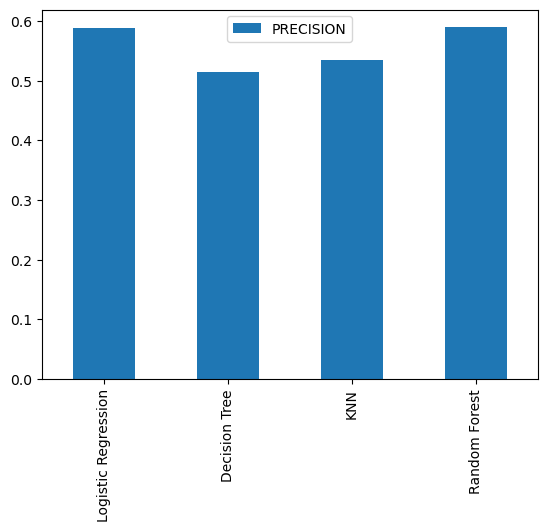

In [32]:
plt.figure(figsize = (10,5))
cmp_df= pd.DataFrame(model_scores_df, index=["PRECISION"])
cmp_df.T.plot.bar()

## Conclusion

- By considering all the pros and cons of our imbalanced dataset, we tried multiple sampling techniques such as random under sampling, random over sampling, and smote. Except for SMOTE, no other method produced better results. We also tried multiple models, but Random Forest produced significantly better results, so it was chosen as our machine learning algorithm for the project.

- As dataset is highly imbalanced, who claimed insurance in the dataset is less than those who did not claim insurance, and the model achieves a precision of 91%, it means that the model is good at predicting the positive class (customers who are likely to file an insurance claim),

### even if the positive class is small in comparison to the negative class (i.e., customers who are not likely to file a claim).



- A precision of 91% means that 91% of all customers predicted by the model as likely to file a claim actually filed a claim. This implies that the model can accurately identify customers who are more likely to file an insurance claim. which can help insurance companies better allocate resources and manage risk.

- The insurance marketing team should focus on building trust with customers, providing value, and addressing their specific needs to increase the likelihood of them purchasing the insurance product.